In [2]:
### from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [3]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [4]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [5]:
# %%javascript
# var nb = IPython.notebook;
# var kernel = IPython.notebook.kernel;
# var command = "NOTEBOOK_NAME = '" + nb.base_url + nb.notebook_path + "'";
# kernel.execute(command);

In [6]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'aha_combined_vhpc'

In [7]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

Unable to restore variable 'do_test_within', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'load_all_animals_vars', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)


In [8]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [9]:
def report_stats (array1, array2, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
        U = sig_func(array1, array2)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        p = sig_func(array1, array2)[-1]
        print "U =",U,"p =",p*mcc,"r =",r
    if sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_ind(x, y)
        cohens_d = (np.mean(array1)-np.mean(array2))/np.sqrt((np.std(array1)**2+np.std(array2)**2)/2)
        p = sig_func(array1, array2)[-1]
        print sig_func(array1, array2),"d =", cohens_d, 'corrected p =',p*mcc
    if sig_func is 'fishers':
        table = array1,array2
        sig_func = lambda x: sstats.fisher_exact(x, alternative='two-sided')
        p = sig_func(table)[-1]
        odds_ratio = sig_func(table)[0]
        print "odd's ratio =", odds_ratio, 'corrected p =',p*mcc
        

def report_stats_chance (array1, chance=0.5, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x: sstats.wilcoxon(x)
        subtracted = [x-chance for x in array1]
        U = sig_func(subtracted)[0]
        z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
        r = z/np.sqrt(loops*2)
        print sig_func(subtracted),"r =",r
    elif sig_func is 'ttest':
        sig_func = lambda x, y: sstats.ttest_1samp(x,y)
        cohens_d = (np.mean(array1)-chance)/np.std(array1)
        print sig_func(array1,chance),"d =",cohens_d

In [10]:
#all_animals =  'c3f3','c3f2','c3m1', 'c3m2', 'c4m3',         'c10m8', '90', '91', '92','93'
#expo_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#pre_animals =  'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#post_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#renew_animals ='c3f3','c3f2','c3m1', 'c3m2', 'c4m3',         'c10m8', '90', '91', '92','93'
#ext2_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#ext1_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'

#removed 92, which learns end of day2
all_animals  = ('c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91',)
d1_animals  = ('c3m2', 'c4m3', 'c4m4', 'c10m8', '90','91',)
d2_animals  = ('c3f3', 'c3f2', 'c3m1',)

# do day 1 and day 2 but ignore mice that are cut off
# in OFC could decode CS right before AHA

#compare decoding odor and trace, 

#vijay cross time bin decoders, selectivity isn't as striking

#should include catch trials when discussing expect outcome




In [11]:
patterns_tb = {}
labels = {}
found = {}

for ani in all_animals:

    exec("patterns_tb[ani] = ut.load_variable('patterns_tb','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("labels[ani] = ut.load_variable('labels','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("found[ani] = ut.load_variable('found_ind','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    
loop_opt = [10,20,30,40]

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in all_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-loo:found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-loo:found['%s']]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']:loo+found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']:loo+found['%s']]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [12]:
patterns_tb['90'].shape

(16, 240, 47)

In [13]:
found

{'90': 47,
 '91': 81,
 'c10m8': 55,
 'c3f2': 144,
 'c3f3': 136,
 'c3m1': 128,
 'c3m2': 49,
 'c4m3': 57,
 'c4m4': 40}

In [14]:
#delta_t0 = 1
#
#t_start0 = -5  # sec
#t_stop0 = 11  # sec

In [15]:
#for sess in ['pre']:
#    exec("labels_tb_%s = {}"%sess)
#    for ani in eval('%s_animals'%sess):
#        exec("labels_tb_%s[%s] = np.r_[[[l]*patterns_tb_%s[%s].shape[0] for l in labels_%s[%s]]].T"%(sess,ani,sess,ani,sess,ani))

In [16]:
#labels_tb_pre = {}
#
#labels_tb_pre['c3f3'] = np.r_[[[l]*patterns_tb_pre['c3f3'].shape[0] for l in labels_pre['c3f3']]].T

In [17]:
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.svm import SVC

def do_test_within(patterns, labels, n_cells=None):
#     which_train = range(90)
#     which_test = range(90)
#    cv =LeaveOneOut()
    
    which_train = {}
    which_test = {}
    for ani in patterns.keys():
        which_train_a = np.random.permutation(np.where(labels[ani]==0)[0])
        which_test_a = which_train_a[:len(which_train_a)/2]
        which_train_a = which_train_a[len(which_train_a)/2:]
        
        which_train_b = np.random.permutation(np.where(labels[ani]==1)[0])
        which_test_b = which_train_b[:len(which_train_b)/2]
        which_train_b = which_train_b[len(which_train_b)/2:]
        
        which_train[ani] = np.concatenate((which_train_a, which_train_b))
        which_test[ani] = np.concatenate((which_test_a, which_test_b))
    
    patterns_t = patterns.copy()
    labels_t = labels.copy()
    patterns_T = patterns.copy()
    labels_T = labels.copy()
    for ani in patterns.keys():
        patterns_t[ani] = patterns[ani][which_train[ani]]
        labels_t[ani] = labels[ani][which_train[ani]]
        patterns_T[ani] = patterns[ani][which_test[ani]]
        labels_T[ani] = labels[ani][which_test[ani]]
    patterns_comb_train, labels_comb = ut.combine_patterns(patterns_t, labels_t)
    patterns_comb_test, labels_comb = ut.combine_patterns(patterns_T, labels_T)
    
    if n_cells is None:
        cells = list(range(patterns_comb_train.shape[1]))
    else:
        cells = np.random.choice(range(patterns_comb_train.shape[1]), size=n_cells, replace=False)
        
    decoder.fit(patterns_comb_train[:, cells], labels_comb)
    scores = decoder.score(patterns_comb_test[:, cells], labels_comb)
    decoder.fit(patterns_comb_test[:, cells], labels_comb)
    return np.append(scores, decoder.score(patterns_comb_train[:, cells], labels_comb))

In [18]:
decoder = SVC(kernel='linear', decision_function_shape='ovo')

In [19]:
#[[[trial for trial in patterns_tb_pre[ani]] for ani in pre_animals]].shape
##trial[trial number][cell#] for blah in pre_animals[animal number]

In [20]:
n_loops = 10
loop_opt = 30

for i in range(100):
    if i == 0:
        for t in [6,8]: # number of time bins
            for f in founds: 
                    exec('m_scores_tb_%s_30_%s = []'%(f,t))
                    exec('scores_tb_%s_30_%s = []'%(f,t))
                    print t,
                    exec("p_str = patterns_tb_%s_30_%s"%(f,t,))
                    exec("l_str = labels_%s_30"%(f,))
                    exec("scores_tb_%s_30_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,t,))
                    exec("m_scores_tb_%s_30_%s.append(np.mean(scores_tb_%s_30_%s[0],axis=1))"%(f,t,f,t))
                    #exec('avg_scores_first_%s_30_%s = scores_tb_%s_30_%s'%(f,t,f,t))
        
    else:
        for t in [6,8]: # number of time bins
            for f in founds: 
                exec('scores_tb_%s_30_%s = []'%(f,t))
                print t,
                exec("p_str = patterns_tb_%s_30_%s"%(f,t,))
                exec("l_str = labels_%s_30"%(f,))
                exec("scores_tb_%s_30_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,t,))
                exec("m_scores_tb_%s_30_%s.append(np.mean(scores_tb_%s_30_%s[0],axis=1))"%(f,t,f,t))
                #exec('avg_scores_second_%s_30_%s = scores_tb_%s_30_%s'%(f,t,f,t))
                #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
                #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 


6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8


In [21]:
np.mean(m_scores_tb_b_30_8)

0.51461000000000001

In [22]:
np.mean(m_scores_tb_a_30_8)

0.67535500000000004

In [23]:
np.mean(m_scores_tb_b_30_6)

0.74023000000000005

In [24]:
np.mean(m_scores_tb_a_30_6)

0.77466000000000002

In [116]:
n_loops = 10
loop_opt = 30



for i in range(100):
    if i == 0:
        for t in [6,8]: # number of time bins
            for f in founds: 
                    exec('avg_scores_first_%s_30_%s = []'%(f,t))
                    exec('scores_tb_%s_30_%s = []'%(f,t))
                    print t,
                    exec("p_str = patterns_tb_%s_30_%s"%(f,t,))
                    exec("l_str = labels_%s_30"%(f,))
                    exec("scores_tb_%s_30_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,t,))
                    exec("scores_tb_%s_30_%s = np.mean(scores_tb_%s_30_%s[0],axis=1)"%(f,t,f,t))
                    exec('avg_scores_first_%s_30_%s = scores_tb_%s_30_%s'%(f,t,f,t))
        
    else:
        exec('avg_scores_%s = []'%(i))
        for t in [6,8]: # number of time bins
            for f in founds: 
                exec('avg_scores_second_%s_30_%s = []'%(f,t))
                exec('scores_tb_%s_30_%s = []'%(f,t))
                print t,
                exec("p_str = patterns_tb_%s_30_%s"%(f,t,))
                exec("l_str = labels_%s_30"%(f,))
                exec("scores_tb_%s_30_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,t,))
                exec("scores_tb_%s_30_%s = np.mean(scores_tb_%s_30_%s[0],axis=1)"%(f,t,f,t))
                exec('avg_scores_second_%s_30_%s = scores_tb_%s_30_%s'%(f,t,f,t))
                #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
                #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

                exec('avg_scores_first_%s_30_%s = np.mean([avg_scores_second_%s_30_%s,avg_scores_first_%s_30_%s],axis=0)'%(f,t,f,t,f,t))

6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8 6 6 8 8


In [128]:
np.mean(avg_scores_first_b_30_8)

0.51748116082509032

In [129]:
np.mean(avg_scores_first_a_30_8)

0.6726811012858247

In [130]:
np.mean(avg_scores_first_b_30_6)

0.73478859522529616

In [131]:
np.mean(avg_scores_first_a_30_6)

0.7757611590747604

In [132]:
sig_func = lambda x: sstats.wilcoxon(x)
chance = .5


subtracted = [x-chance for x in avg_scores_first_b_30_8]
tr = sig_func(subtracted)[-1]
p_thresh = .01
print tr

0.168806953557


9.13358955548e-05
0.0156045063859


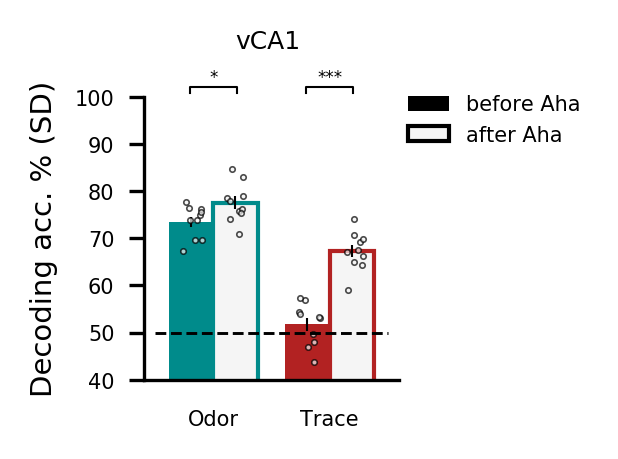

In [139]:
from matplotlib.patches import Patch
labels = ['Odor','Trace']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
#loops=10
v={}
d={}
to_plot = [1,2]

dark_co = ('forestgreen','darkcyan','firebrick','lightgrey','dimgrey','goldenrod')
fig, ax = pl.subplots(figsize=(1.1,1.25))
for c,i in zip(to_plot,range(2)):
    if c ==1:
        v = np.array(sstats.sem(avg_scores_first_b_30_6)*100)
        ax.bar(i - width/2, np.mean(avg_scores_first_b_30_6)*100, width, color=dark_co[c],yerr=v)
        ax.scatter(i - width/2+np.random.random(avg_scores_first_b_30_6.size)*width/2-width/4.5,avg_scores_first_b_30_6*100,\
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
        d = np.array(sstats.sem(avg_scores_first_a_30_6)*100)
        ax.bar(i + width/2,  np.mean(avg_scores_first_a_30_6)*100, width,color='whitesmoke', edgecolor=dark_co[c],yerr=d)
        ax.scatter(i + width/2+np.random.random(avg_scores_first_a_30_6.size)*width/2-width/4.5,avg_scores_first_a_30_6*100,\
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
    else:
        v = np.array(sstats.sem(avg_scores_first_b_30_8)*100)
        ax.bar(i - width/2, np.mean(avg_scores_first_b_30_8)*100, width, color=dark_co[c],yerr=v)
        ax.scatter(i - width/2+np.random.random(avg_scores_first_b_30_8.size)*width/2-width/4.5,avg_scores_first_b_30_8*100,\
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
        d = np.array(sstats.sem(avg_scores_first_a_30_8)*100)
        ax.bar(i + width/2,  np.mean(avg_scores_first_a_30_8)*100, width,color='whitesmoke', edgecolor=dark_co[c],yerr=d)
        ax.scatter(i + width/2+np.random.random(avg_scores_first_a_30_8.size)*width/2-width/4.5,avg_scores_first_a_30_8*100,\
               color='whitesmoke',s=1.7,zorder=2,alpha=.7,linewidths=.4,edgecolor='k')
        
ax.hlines(50,-.5,1.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc. % (SD)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['before Aha','after Aha'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
pvs.append(add_significance(ax, avg_scores_first_b_30_8, avg_scores_first_a_30_8,-.2+1,0.2+1,102))
pvs.append(add_significance(ax, avg_scores_first_b_30_6, avg_scores_first_a_30_6,-.2+0,0.2+0,102))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('vCA1',y=1.06,fontsize=6)

fig.savefig('../final-ish figures/%s_aha_bars.pdf'%NOTEBOOK_NAME)

In [134]:
def report_stats (array1, array2, sig_func=None,mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
    U = sig_func(array1, array2)[0]
    z = ((U-((loops*loops)/2))/(np.sqrt(((loops*loops)*(loops+loops+1))/12)))
    r = z/np.sqrt(loops*2)
    p = sig_func(array1, array2)[-1]
    print "U =",U,"p =",p*mcc,"r =",r

In [135]:
report_stats(avg_scores_first_b_30_6,avg_scores_first_a_30_6)

U = 21.0 p = 0.0312090127717 r = -0.490189467743


In [136]:
report_stats(avg_scores_first_b_30_8,avg_scores_first_a_30_8)

U = 0.0 p = 0.00018267179111 r = -0.845154254729


In [290]:
n_n_loops = 10
loo_opt = 30

avg_scores

for i in range(100):
    exec('avg_scores_%s = []'%(i))
    for t in [6,8]: # number of time bins
        for loo in loop_opt:
            for f in founds: 
                exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
                print t,
                exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
                exec("l_str = labels_%s_%s"%(f,loo,))
                exec("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,))
                #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
                #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 
    avg_scores

6 6 6 6 6 6 6 6 8 8 8 8 8 8 8 8


In [291]:
np.mean(scores_tb_a_30_8)

0.64475000000000005

In [292]:
n_loops = 100
#for t in range(16): # number of time bins
for t in [6,8]: # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            exec("scores_tb_%s_%s_%s = np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]]"%(f,loo,t,))
            #exec("scores_tb_%s_%s_%s = np.mean(scores_tb_%s_%s_%s,1)"%(f,loo,t,f,loo,t))
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

6 6 6 6 6 6 6 6 8 8 8 8 8 8 8 8


In [293]:
np.mean(scores_tb_a_30_8)

0.69999999999999996

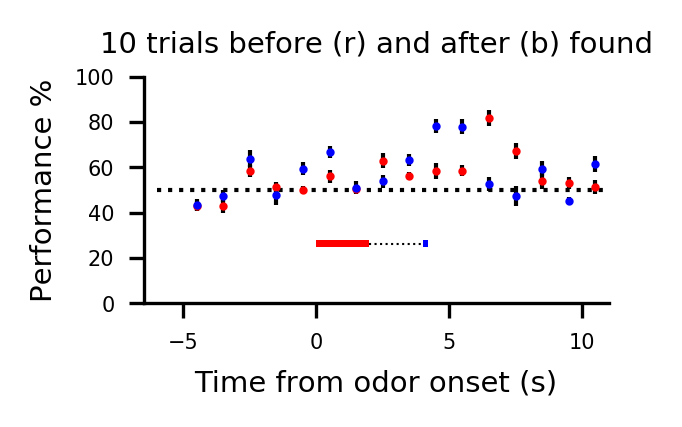

In [210]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t).shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t).shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

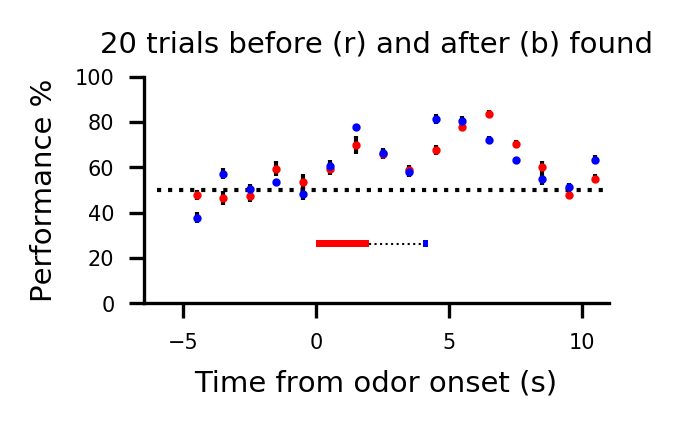

In [212]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t).shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t).shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

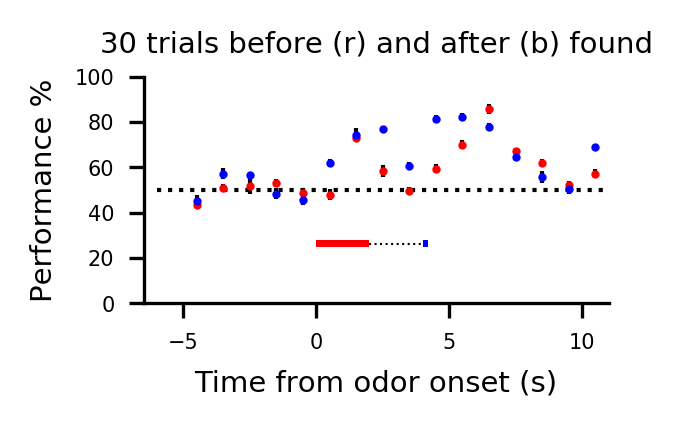

In [211]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t).shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t).shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

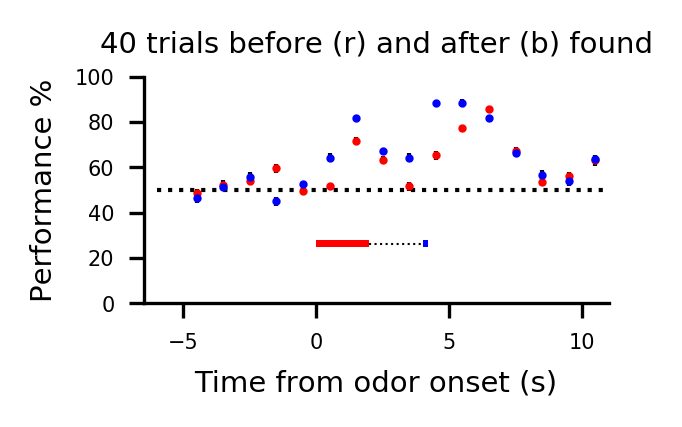

In [213]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_40_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_40_%s"%t))*100
    s = np.std(eval("scores_tb_b_40_%s"%t))*100 / np.sqrt(eval("scores_tb_b_40_%s"%t).shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_40_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_40_%s"%t))*100
    s = np.std(eval("scores_tb_a_40_%s"%t))*100 / np.sqrt(eval("scores_tb_a_40_%s"%t).shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('40 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

from scipy.stats import sem
from matplotlib.lines import Line2D
def add_significance(ax, array1, array2, x1, x2, y, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1):
    array1 = np.mean(array1[0][:],axis=1)
    array2 = np.mean(array2[0][:],axis=1)
    if sig_func is None:
        #sig_func = lambda x, y: sstats.mannwhitneyu(x, y,)
        sig_func = lambda x, y: sstats.f_oneway(x[0],y[0])
    p = sig_func(array1, array2)[-1]
    p=p[0]
    print p
    sig_value = sig_func(array1, array2)[0]
    deltay = np.diff(ax.axis()[-2:])*ticksize
    line = Line2D([x1, x1, x2, x2], [y-deltay, y, y, y-deltay], lw=.5, color='k', clip_on=False)
    ax.add_line(line)
    ax.text(np.mean([x1, x2]), y+1,
            'n.s.' if p > thresholds[0]/mcc else
            '*' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=4)
    return sig_value, p

In [41]:
from scipy.stats import sem
from matplotlib.lines import Line2D
def add_significance(ax, array1, array2, x1, x2, y, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001),mcc=1):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y,)
    p = sig_func(array1, array2)[-1]
    print p
    sig_value = sig_func(array1, array2)[0]
    deltay = np.diff(ax.axis()[-2:])*ticksize
    line = Line2D([x1, x1, x2, x2], [y-deltay, y, y, y-deltay], lw=.5, color='k', clip_on=False)
    ax.add_line(line)
    ax.text(np.mean([x1, x2]), y+1,
            'n.s.' if p > thresholds[0]/mcc else
            '*' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=4)
    return sig_value, p

0.000331741179384
0.0478389289871


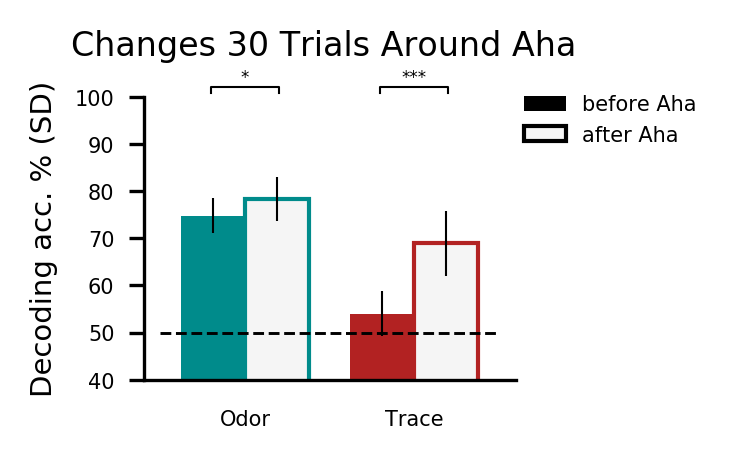

In [40]:
from matplotlib.patches import Patch
labels = ['Odor','Trace']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
#loops=10
v={}
d={}
to_plot = [1,2]

dark_co = ('forestgreen','darkcyan','firebrick','lightgrey','dimgrey','goldenrod')
fig, ax = pl.subplots(figsize=(1.6,1.25))
for c,i in zip(to_plot,range(2)):
    if c ==1:
        v = np.array(np.std(scores_tb_b_30_6)*100)
        ax.bar(i - width/2, np.mean(scores_tb_b_30_6)*100, width, color=dark_co[c],yerr=v)
        d = np.array(np.std(scores_tb_a_30_6)*100)
        ax.bar(i + width/2,  np.mean(scores_tb_a_30_6)*100, width,color='whitesmoke', edgecolor=dark_co[c],yerr=d)
    else:
        v = np.array(np.std(scores_tb_b_30_8)*100)
        ax.bar(i - width/2, np.mean(scores_tb_b_30_8)*100, width, color=dark_co[c],yerr=v)
        d = np.array(np.std(scores_tb_a_30_8)*100)
        ax.bar(i + width/2,  np.mean(scores_tb_a_30_8)*100, width,color='whitesmoke', edgecolor=dark_co[c],yerr=d)
ax.hlines(50,-.5,1.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc. % (SD)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['before Aha','after Aha'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
pvs.append(add_significance(ax, scores_tb_b_30_8, scores_tb_a_30_8,-.2+1,0.2+1,102))
pvs.append(add_significance(ax, scores_tb_b_30_6, scores_tb_a_30_6,-.2+0,0.2+0,102))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Changes 30 Trials Around Aha',y=1.06,fontsize=8)

#fig.savefig('../final-ish figures/%s_gmin_bars_odor_PrPo_b.pdf'%NOTEBOOK_NAME)

In [262]:
scores_tb_a_30_8

array([ 0.7275,  0.7575,  0.76  ,  0.565 ,  0.6525,  0.6775,  0.825 ,
        0.645 ,  0.695 ,  0.7525])

In [263]:
t =np.mean(scores_tb_a_30_8)
a = np.mean(scores_tb_a_30_8[0])
print t
print a

0.70575
0.7275


0.000331741179384
0.0478389289871


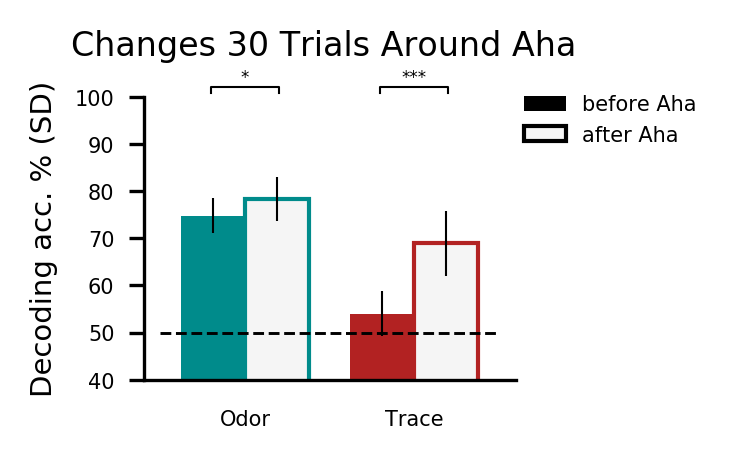

In [41]:
from matplotlib.patches import Patch
labels = ['Odor','Trace']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
#loops=10
v={}
d={}
to_plot = [1,2]

dark_co = ('forestgreen','darkcyan','firebrick','lightgrey','dimgrey','goldenrod')
fig, ax = pl.subplots(figsize=(1.6,1.25))
for c,i in zip(to_plot,range(2)):
    if c ==1:
        v = np.array(np.std(scores_tb_b_30_6)*100)
        ax.bar(i - width/2, np.mean(scores_tb_b_30_6)*100, width, color=dark_co[c],yerr=v)
        d = np.array(np.std(scores_tb_a_30_6)*100)
        ax.bar(i + width/2,  np.mean(scores_tb_a_30_6)*100, width,color='whitesmoke', edgecolor=dark_co[c],yerr=d)
    else:
        v = np.array(np.std(scores_tb_b_30_8)*100)
        ax.bar(i - width/2, np.mean(scores_tb_b_30_8)*100, width, color=dark_co[c],yerr=v)
        d = np.array(np.std(scores_tb_a_30_8)*100)
        ax.bar(i + width/2,  np.mean(scores_tb_a_30_8)*100, width,color='whitesmoke', edgecolor=dark_co[c],yerr=d)
ax.hlines(50,-.5,1.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc. % (SD)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['before Aha','after Aha'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
pvs.append(add_significance(ax, scores_tb_b_30_8, scores_tb_a_30_8,-.2+1,0.2+1,102))
pvs.append(add_significance(ax, scores_tb_b_30_6, scores_tb_a_30_6,-.2+0,0.2+0,102))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Changes 30 Trials Around Aha',y=1.06,fontsize=8)

#fig.savefig('../final-ish figures/%s_gmin_bars_odor_PrPo_b.pdf'%NOTEBOOK_NAME)

In [228]:
scores_tb_b_30_8

array([ 0.4875,  0.485 ,  0.535 ,  0.47  ,  0.485 ,  0.425 ,  0.54  ,
        0.45  ,  0.5025,  0.5925])

In [229]:
scores_tb_a_30_8

array([ 0.6   ,  0.6675,  0.6275,  0.575 ,  0.5375,  0.6775,  0.575 ,
        0.6   ,  0.56  ,  0.6575])

In [231]:
#for Jeremy -45--35 and 5-15
patterns_tb = {}
labels = {}
found = {}

for ani in all_animals:

    exec("patterns_tb[ani] = ut.load_variable('patterns_tb','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("labels[ani] = ut.load_variable('labels','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("found[ani] = ut.load_variable('found_ind','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    
loop_opt = [10,]

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in [6,8]:
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in all_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-loo-30:found['%s']-30]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-loo-30:found['%s']-30]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']+5:loo+found['%s']+5]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']+5:loo+found['%s']+5]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [232]:
n_loops = 10
for t in [6,8]: # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

6 6 8 8


In [42]:
scores_tb_b_10_6

[array([[ 1.   ,  0.76 ],
        [ 0.87 ,  0.935],
        [ 0.36 ,  0.67 ],
        [ 0.5  ,  0.645],
        [ 0.865,  0.715],
        [ 0.5  ,  0.775],
        [ 0.77 ,  0.5  ],
        [ 0.5  ,  1.   ],
        [ 0.87 ,  0.765],
        [ 0.5  ,  0.745],
        [ 0.435,  0.695],
        [ 0.755,  0.75 ],
        [ 0.945,  0.795],
        [ 0.5  ,  0.63 ],
        [ 0.5  ,  0.305],
        [ 0.5  ,  0.555],
        [ 0.5  ,  0.74 ],
        [ 0.845,  0.64 ],
        [ 0.65 ,  0.915],
        [ 0.605,  0.655],
        [ 0.5  ,  0.7  ],
        [ 0.5  ,  0.705],
        [ 0.5  ,  0.845],
        [ 0.415,  0.745],
        [ 0.5  ,  0.495],
        [ 1.   ,  0.735],
        [ 0.55 ,  0.805],
        [ 0.5  ,  0.655],
        [ 0.73 ,  0.835],
        [ 0.5  ,  0.5  ],
        [ 1.   ,  0.625],
        [ 0.5  ,  0.5  ],
        [ 0.5  ,  0.84 ],
        [ 0.5  ,  0.84 ],
        [ 0.73 ,  0.705],
        [ 1.   ,  0.73 ],
        [ 0.5  ,  0.695],
        [ 0.915,  0.755],
        [ 0.

In [245]:
t = np.mean(scores_tb_b_10_6[0],1)
t = np.mean(t)
t

0.46449999999999997

In [235]:
np.mean(scores_tb_b_10_6)*100

46.449999999999996

0.0
0.0


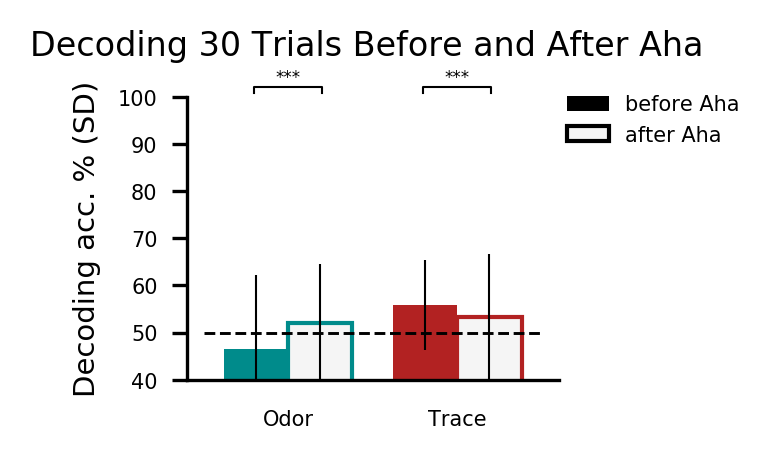

In [233]:
from matplotlib.patches import Patch
labels = ['Odor','Trace']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
#loops=10
v={}
d={}
to_plot = [1,2]

dark_co = ('forestgreen','darkcyan','firebrick','lightgrey','dimgrey','goldenrod')
fig, ax = pl.subplots(figsize=(1.6,1.25))
for c,i in zip(to_plot,range(2)):
    if c ==1:
        v = np.array(np.std(scores_tb_b_10_6)*100)
        ax.bar(i - width/2, np.mean(scores_tb_b_10_6)*100, width, color=dark_co[c],yerr=v)
        d = np.array(np.std(scores_tb_a_10_6)*100)
        ax.bar(i + width/2,  np.mean(scores_tb_a_10_6)*100, width,color='whitesmoke', edgecolor=dark_co[c],yerr=d)
    else:
        v = np.array(np.std(scores_tb_b_10_8)*100)
        ax.bar(i - width/2, np.mean(scores_tb_b_10_8)*100, width, color=dark_co[c],yerr=v)
        d = np.array(np.std(scores_tb_a_10_8)*100)
        ax.bar(i + width/2,  np.mean(scores_tb_a_10_8)*100, width,color='whitesmoke', edgecolor=dark_co[c],yerr=d)
ax.hlines(50,-.5,1.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc. % (SD)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['before Aha','after Aha'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
for i in range(2):
    pvs.append(add_significance(ax, scores_tb_b_10_8, scores_tb_a_10_8,
        -.2+i,0.2+i,102))
for i in range(0):
    pvs.append(add_significance(ax, scores_tb_b_10_6, scores_tb_a_10_6,
        -.2+i,0.2+i,102))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('Decoding 30 Trials Before and After Aha',y=1.06,fontsize=8)

#fig.savefig('../final-ish figures/%s_gmin_bars_odor_PrPo_b.pdf'%NOTEBOOK_NAME)

In [ ]:
patterns_tb = {}
labels = {}
found = {}

for ani in d1_animals:

    exec("patterns_tb[ani] = ut.load_variable('patterns_tb','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("labels[ani] = ut.load_variable('labels','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("found[ani] = ut.load_variable('found_ind','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    
loop_opt = [10,20,30,40]

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in d1_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-loo:found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-loo:found['%s']]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']:loo+found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']:loo+found['%s']]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [ ]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
patterns_tb = {}
labels = {}
found = {}

for ani in d2_animals:

    exec("patterns_tb[ani] = ut.load_variable('patterns_tb','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("labels[ani] = ut.load_variable('labels','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("found[ani] = ut.load_variable('found_ind','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    
loop_opt = [10,20,30,40]

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in d2_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-loo:found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-loo:found['%s']]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']:loo+found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']:loo+found['%s']]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [ ]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [225]:
loop_opt = [10,20,30]

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in all_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-5-loo:found['%s']-5]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-5-loo:found['%s']-5]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-5:loo+found['%s']-5]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-5:loo+found['%s']-5]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



TypeError: list indices must be integers, not str

In [226]:
found

{'90': 40,
 '91': 40,
 'c10m8': 40,
 'c3f2': 40,
 'c3f3': 40,
 'c3m1': 40,
 'c3m2': 40,
 'c4m3': 40,
 'c4m4': 40}

In [227]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

0

KeyError: 'c3f3'

In [ ]:
np.mean(scores_tb_b_10_0[0])


In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
loop_opt = [10,20,30,]

shift = 10

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in all_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-shift-loo:found['%s']-shift]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-shift-loo:found['%s']-shift]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']+shift:loo+found['%s']+shift]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']+shift:loo+found['%s']+shift]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [ ]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
loop_opt = [10,20,30,40]

shift = 5
ex_shift = 10

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in all_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-ex_shift-loo-shift:found['%s']-ex_shift-shift]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-ex_shift-loo-shift:found['%s']-ex_shift-shift]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']+ex_shift-shift:loo+found['%s']+ex_shift-shift]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']+ex_shift-shift:loo+found['%s']+ex_shift-shift]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [ ]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_40_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_40_%s"%t))*100
    s = np.std(eval("scores_tb_b_40_%s"%t))*100 / np.sqrt(eval("scores_tb_b_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_40_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_40_%s"%t))*100
    s = np.std(eval("scores_tb_a_40_%s"%t))*100 / np.sqrt(eval("scores_tb_a_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('40 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
all_animals  = ('c3m2', 'c4m3', 'c10m8', '90', '91',)
d1_animals  = ('c3m2', 'c4m3', 'c10m8', '90','91')

# do day 1 and day 2 but ignore mice that are cut off
# in OFC could decode CS right before AHA

#compare decoding odor and trace, 

#vijay cross time bin decoders, selectivity isn't as striking

#should include catch trials when discussing expect outcome




In [ ]:
loop_opt = [10,20,30,40]

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in all_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-loo:found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-loo:found['%s']]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']:loo+found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']:loo+found['%s']]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [ ]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_40_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_40_%s"%t))*100
    s = np.std(eval("scores_tb_b_40_%s"%t))*100 / np.sqrt(eval("scores_tb_b_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_40_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_40_%s"%t))*100
    s = np.std(eval("scores_tb_a_40_%s"%t))*100 / np.sqrt(eval("scores_tb_a_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('40 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
loop_opt = [10,20,30,40]

shift = 5
ex_shift = 10

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in all_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-ex_shift-loo-shift:found['%s']-ex_shift-shift]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-ex_shift-loo-shift:found['%s']-ex_shift-shift]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']+ex_shift-shift:loo+found['%s']+ex_shift-shift]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']+ex_shift-shift:loo+found['%s']+ex_shift-shift]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [ ]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_40_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_40_%s"%t))*100
    s = np.std(eval("scores_tb_b_40_%s"%t))*100 / np.sqrt(eval("scores_tb_b_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_40_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_40_%s"%t))*100
    s = np.std(eval("scores_tb_a_40_%s"%t))*100 / np.sqrt(eval("scores_tb_a_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('40 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
found

In [ ]:
found = {'90': 70, '91': 55, 'c3m2': 60, 'c4m3': 55, 'c4m4': 40, 'c10m8': 57, }
#max’s found: c3m2 (~60), c3f2 (128), c3f3 (132), c3m1 (130),  c4m3(22 or 122), c4m4(38), c10m8(57), 90(70), 91(55), 92(170)


In [ ]:
all_animals = ('c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91',)

In [ ]:
loop_opt = [10,20,30,40]

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in all_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-loo:found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-loo:found['%s']]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']:loo+found['%s']]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']:loo+found['%s']]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [ ]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_40_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_40_%s"%t))*100
    s = np.std(eval("scores_tb_b_40_%s"%t))*100 / np.sqrt(eval("scores_tb_b_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_40_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_40_%s"%t))*100
    s = np.std(eval("scores_tb_a_40_%s"%t))*100 / np.sqrt(eval("scores_tb_a_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('40 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
all_animals = ('c3m2', 'c4m3', 'c10m8', '90', '91',)

In [ ]:
loop_opt = [10,20,30,40]

shift = 5
ex_shift = 10

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
for f in founds:
    for loo in loop_opt:
        for t in range(0,16):
            exec('patterns_tb_%s_%s_%s = {}'%(f,loo,t,))
            exec('labels_%s_%s = {}'%(f,loo,))
            for ani in all_animals:
                try:
                    exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(f,loo,t,ani,ani,t))
                    if f == 'b':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-ex_shift-loo-shift:found['%s']-ex_shift-shift]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-ex_shift-loo-shift:found['%s']-ex_shift-shift]"%(f,loo,ani,ani,ani,ani))
                    elif f == 'a':
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']+ex_shift-shift:loo+found['%s']+ex_shift-shift]"%(f,loo,t,ani,f,loo,t,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']+ex_shift-shift:loo+found['%s']+ex_shift-shift]"%(f,loo,ani,ani,ani,ani))

                except IOError as error:
                    print error
                continue    



In [ ]:
n_loops = 100
for t in range(16): # number of time bins
    for loo in loop_opt:
        for f in founds: 
            exec('scores_tb_%s_%s_%s = []'%(f,loo,t))
            print t,
            exec("p_str = patterns_tb_%s_%s_%s"%(f,loo,t,))
            exec("l_str = labels_%s_%s"%(f,loo,))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(f,loo,t,)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_40_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_40_%s"%t))*100
    s = np.std(eval("scores_tb_b_40_%s"%t))*100 / np.sqrt(eval("scores_tb_b_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_40_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_40_%s"%t))*100
    s = np.std(eval("scores_tb_a_40_%s"%t))*100 / np.sqrt(eval("scores_tb_a_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('40 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [55]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [56]:
found

{'90': 47,
 '91': 81,
 'c10m8': 55,
 'c3f2': 144,
 'c3f3': 136,
 'c3m1': 128,
 'c3m2': 49,
 'c4m3': 57,
 'c4m4': 40}

In [57]:
t_found = found
t_found

{'90': 47,
 '91': 81,
 'c10m8': 55,
 'c3f2': 144,
 'c3f3': 136,
 'c3m1': 128,
 'c3m2': 49,
 'c4m3': 57,
 'c4m4': 40}

In [58]:
all_animals

('c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91')

In [438]:
vals_step = range(40)
vals_step
vals_step.reverse()
for i in range(61):
    if i>0:
        vals_step.append(i)
print vals_step

[39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


In [60]:
len(vals_step)

60

In [73]:
patterns_tb = {}
labels = {}
found = {}

for ani in d1_animals:

    exec("patterns_tb[ani] = ut.load_variable('patterns_tb','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("labels[ani] = ut.load_variable('labels','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("found[ani] = ut.load_variable('found_ind','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    
loop_opt = [20]

#okay so I have found points and want to look in 20 trial bins starting 20 trials before

#for i in range(len(found)):
#    found[found.keys()[i]] = 40

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
step_int = 0
for loo in loop_opt:
    for step in vals_step:
        step_int = step_int + 1
        for t in [6,8]:
            exec('patterns_tb_%s_%s_%s = {}'%(loo,t,step_int))
            exec('labels_%s_%s = {}'%(loo,step_int))
            for ani in d1_animals:
                if step_int<=40:
                    try:
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(loo,t,step_int,ani,ani,t))
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-step:found['%s']-step+loo]"%(loo,t,step_int,ani,loo,t,step_int,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-step:found['%s']-step+loo]"%(loo,step_int,ani,ani,ani,ani))

                    except IOError as error:
                        print error
                    continue    

                elif step_int>40:
                    try:
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(loo,t,step_int,ani,ani,t))
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']+step:found['%s']+step+loo]"%(loo,t,step_int,ani,loo,t,step_int,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']+step:found['%s']+step+loo]"%(loo,step_int,ani,ani,ani,ani))

                    except IOError as error:
                        print error
                    continue    



In [74]:
found

{'90': 47, '91': 81, 'c10m8': 55, 'c3m2': 49, 'c4m3': 57, 'c4m4': 40}

In [75]:
n_loops = 10
step_int=0
for step in vals_step:
    step_int = step_int + 1
    for t in [6,8]: # number of time bins
        for loo in loop_opt:
            exec('scores_tb_%s_%s_%s = []'%(loo,t,step_int))
            print step,
            exec("p_str = patterns_tb_%s_%s_%s"%(loo,t,step_int))
            exec("l_str = labels_%s_%s"%(loo,step_int))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(loo,t,step_int)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 


39 39 38 38 37 37 36 36 35 35 34 34 33 33 32 32 31 31 30 30 29 29 28 28 27 27 26 26 25 25 24 24 23 23 22 22 21 21 20 20 19 19 18 18 17 17 16 16 15 15 14 14 13 13 12 12 11 11 10 10 9 9 8 8 7 7 6 6 5 5 4 4 3 3 2 2 1 1 0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9 10 10 11 11 12 12 13 13 14 14 15 15 16 16 17 17 18 18 19 19 20 20 21 21 22 22 23 23 24 24 25 25 26 26 27 27 28 28 29 29 30 30 31 31 32 32 33 33 34 34 35 35 36 36 37 37 38 38 39 39 40 40


In [76]:
steps_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60]

In [77]:
len(vals_step)

80

In [79]:
steps_list = []

for i in range(len(vals_step)):
    steps_list.append(i+1)

In [80]:
ste_list = []
t_arr = []
for i in range(40):
    t_arr.append(i)
t_arr.reverse()
for i in range(40):
    t_arr[i] = t_arr[i]*-1
for i in range(40):
    ste_list.append(t_arr[i])
for i in range(len(vals_step)-40):
    ste_list.append(i)

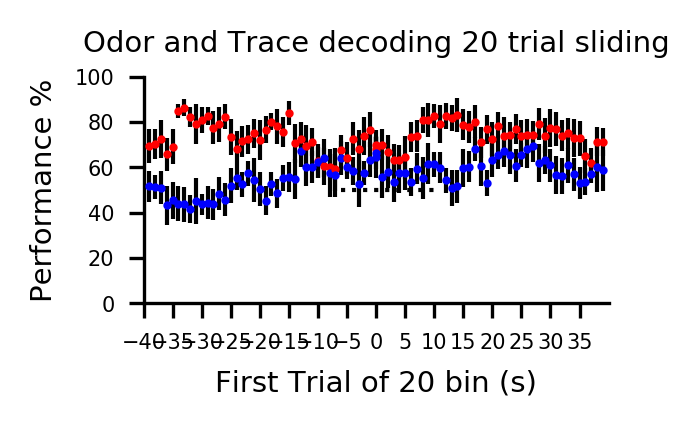

In [83]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
count = 0
for step_int in steps_list:
    ax.plot(ste_list[count], np.mean(eval("scores_tb_20_6_%s"%step_int))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_20_6_%s"%step_int))*100
    s = np.std(eval("scores_tb_20_6_%s"%step_int))*100 / np.sqrt(eval("scores_tb_20_6_%s"%step_int)[0].shape[-1])
    ax.errorbar(ste_list[count], m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(ste_list[count], np.mean(eval("scores_tb_20_8_%s"%step_int))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_20_8_%s"%step_int))*100
    s = np.std(eval("scores_tb_20_8_%s"%step_int))*100 / np.sqrt(eval("scores_tb_20_8_%s"%step_int)[0].shape[-1])
    ax.errorbar(ste_list[count], m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    count = count + 1
ax.set_ylim(0, 100)
ax.set_xlim(-40, len(vals_step)-40)
ax.set_xticks(np.arange(-40,len(vals_step)-40, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('First Trial of 20 bin (s)')
ax.set_ylabel('Performance %')
ax.set_title('Odor and Trace decoding 20 trial sliding')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [85]:
patterns_tb = {}
labels = {}
found = {}

for ani in d1_animals:

    exec("patterns_tb[ani] = ut.load_variable('patterns_tb','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("labels[ani] = ut.load_variable('labels','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("found[ani] = ut.load_variable('found_ind','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    
loop_opt = [30]

#okay so I have found points and want to look in 20 trial bins starting 20 trials before

#for i in range(len(found)):
#    found[found.keys()[i]] = 40

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
step_int = 0
for loo in loop_opt:
    for step in vals_step:
        step_int = step_int + 1
        for t in [6,8]:
            exec('patterns_tb_%s_%s_%s = {}'%(loo,t,step_int))
            exec('labels_%s_%s = {}'%(loo,step_int))
            for ani in d1_animals:
                if step_int<=40:
                    try:
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(loo,t,step_int,ani,ani,t))
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-step:found['%s']-step+loo]"%(loo,t,step_int,ani,loo,t,step_int,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-step:found['%s']-step+loo]"%(loo,step_int,ani,ani,ani,ani))

                    except IOError as error:
                        print error
                    continue    

                elif step_int>40:
                    try:
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(loo,t,step_int,ani,ani,t))
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']+step:found['%s']+step+loo]"%(loo,t,step_int,ani,loo,t,step_int,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']+step:found['%s']+step+loo]"%(loo,step_int,ani,ani,ani,ani))

                    except IOError as error:
                        print error
                    continue    



In [86]:
n_loops = 10
step_int=0
for step in vals_step:
    step_int = step_int + 1
    for t in [6,8]: # number of time bins
        for loo in loop_opt:
            exec('scores_tb_%s_%s_%s = []'%(loo,t,step_int))
            print step,
            exec("p_str = patterns_tb_%s_%s_%s"%(loo,t,step_int))
            exec("l_str = labels_%s_%s"%(loo,step_int))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(loo,t,step_int)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 


39 39 38 38 37 37 36 36 35 35 34 34 33 33 32 32 31 31 30 30 29 29 28 28 27 27 26 26 25 25 24 24 23 23 22 22 21 21 20 20 19 19 18 18 17 17 16 16 15 15 14 14 13 13 12 12 11 11 10 10 9 9 8 8 7 7 6 6 5 5 4 4 3 3 2 2 1 1 0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9 10 10 11 11 12 12 13 13 14 14 15 15 16 16 17 17 18 18 19 19 20 20 21 21 22 22 23 23 24 24 25 25 26 26 27 27 28 28 29 29 30 30 31 31 32 32 33 33 34 34 35 35 36 36 37 37 38 38 39 39 40 40


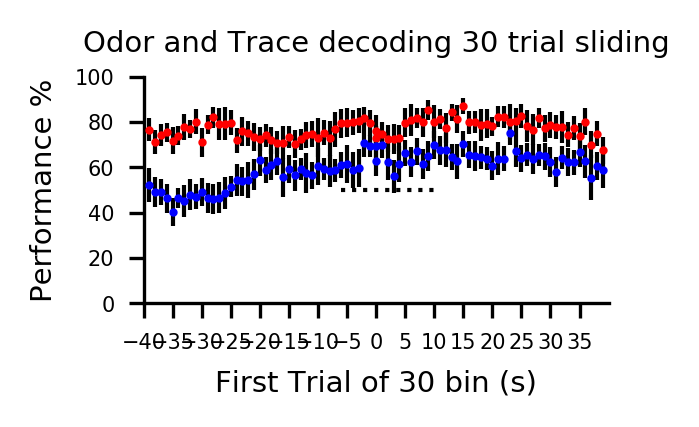

In [87]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
count = 0
for step_int in steps_list:
    ax.plot(ste_list[count], np.mean(eval("scores_tb_30_6_%s"%step_int))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_30_6_%s"%step_int))*100
    s = np.std(eval("scores_tb_30_6_%s"%step_int))*100 / np.sqrt(eval("scores_tb_30_6_%s"%step_int)[0].shape[-1])
    ax.errorbar(ste_list[count], m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(ste_list[count], np.mean(eval("scores_tb_30_8_%s"%step_int))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_30_8_%s"%step_int))*100
    s = np.std(eval("scores_tb_30_8_%s"%step_int))*100 / np.sqrt(eval("scores_tb_30_8_%s"%step_int)[0].shape[-1])
    ax.errorbar(ste_list[count], m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    count = count + 1
ax.set_ylim(0, 100)
ax.set_xlim(-40, len(vals_step)-40)
ax.set_xticks(np.arange(-40,len(vals_step)-40, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('First Trial of 30 bin (s)')
ax.set_ylabel('Performance %')
ax.set_title('Odor and Trace decoding 30 trial sliding')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [71]:
for stats: anova, difference between lines
    
    shift to middle instead of beginning
    
    see if I can explain the difference between these aha binned plots and the plots that are consistently temporally binned
    change error to sem
    change error plot to transparent lines

SyntaxError: invalid syntax (<ipython-input-71-0a63e677d762>, line 1)

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_10_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_10_%s"%t))*100
    s = np.std(eval("scores_tb_b_10_%s"%t))*100 / np.sqrt(eval("scores_tb_b_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_10_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_10_%s"%t))*100
    s = np.std(eval("scores_tb_a_10_%s"%t))*100 / np.sqrt(eval("scores_tb_a_10_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('10 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_20_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_20_%s"%t))*100
    s = np.std(eval("scores_tb_b_20_%s"%t))*100 / np.sqrt(eval("scores_tb_b_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_20_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_20_%s"%t))*100
    s = np.std(eval("scores_tb_a_20_%s"%t))*100 / np.sqrt(eval("scores_tb_a_20_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('20 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_30_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_30_%s"%t))*100
    s = np.std(eval("scores_tb_b_30_%s"%t))*100 / np.sqrt(eval("scores_tb_b_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_30_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_30_%s"%t))*100
    s = np.std(eval("scores_tb_a_30_%s"%t))*100 / np.sqrt(eval("scores_tb_a_30_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('30 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [ ]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax.plot(t-4.5, np.mean(eval("scores_tb_b_40_%s"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_b_40_%s"%t))*100
    s = np.std(eval("scores_tb_b_40_%s"%t))*100 / np.sqrt(eval("scores_tb_b_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(t-4.5, np.mean(eval("scores_tb_a_40_%s"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_a_40_%s"%t))*100
    s = np.std(eval("scores_tb_a_40_%s"%t))*100 / np.sqrt(eval("scores_tb_a_40_%s"%t)[0].shape[-1])
    ax.errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
ax.set_ylim(0, 100)
ax.set_xlim(-6.5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.set_title('40 trials before (r) and after (b) found')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [56]:
found

{'90': 47,
 '91': 81,
 'c10m8': 55,
 'c3f2': 144,
 'c3f3': 136,
 'c3m1': 128,
 'c3m2': 49,
 'c4m3': 57,
 'c4m4': 40}

In [57]:
t_found = found
t_found

{'90': 47,
 '91': 81,
 'c10m8': 55,
 'c3f2': 144,
 'c3f3': 136,
 'c3m1': 128,
 'c3m2': 49,
 'c4m3': 57,
 'c4m4': 40}

In [136]:
all_animals

('c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91')

In [646]:
vals_step = range(40)
vals_step
vals_step.reverse()
for i in range(21):
    if i>0:
        vals_step.append(i)
print vals_step

 [39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [647]:
len(vals_step)

60

In [139]:
patterns_tb = {}
labels = {}
found = {}

for ani in all_animals:

    exec("patterns_tb[ani] = ut.load_variable('patterns_tb','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("labels[ani] = ut.load_variable('labels','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("found[ani] = ut.load_variable('found_ind','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    
loop_opt = [20]

#okay so I have found points and want to look in 20 trial bins starting 20 trials before

for i in range(len(found)):
    found[found.keys()[i]] = 40

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
step_int = 0
for loo in loop_opt:
    for step in vals_step:
        step_int = step_int + 1
        for t in [6,8]:
            exec('patterns_tb_%s_%s_%s = {}'%(loo,t,step_int))
            exec('labels_%s_%s = {}'%(loo,step_int))
            for ani in all_animals:
                if step_int<=40:
                    try:
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(loo,t,step_int,ani,ani,t))
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-step:found['%s']-step+loo]"%(loo,t,step_int,ani,loo,t,step_int,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-step:found['%s']-step+loo]"%(loo,step_int,ani,ani,ani,ani))

                    except IOError as error:
                        print error
                    continue    

                elif step_int>40:
                    try:
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(loo,t,step_int,ani,ani,t))
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']+step:found['%s']+step+loo]"%(loo,t,step_int,ani,loo,t,step_int,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']+step:found['%s']+step+loo]"%(loo,step_int,ani,ani,ani,ani))

                    except IOError as error:
                        print error
                    continue    



In [140]:
found

{'90': 40,
 '91': 40,
 'c10m8': 40,
 'c3f2': 40,
 'c3f3': 40,
 'c3m1': 40,
 'c3m2': 40,
 'c4m3': 40,
 'c4m4': 40}

In [141]:
n_loops = 10
step_int=0
for step in vals_step:
    step_int = step_int + 1
    for t in [6,8]: # number of time bins
        for loo in loop_opt:
            exec('scores_tb_%s_%s_%s = []'%(loo,t,step_int))
            print step,
            exec("p_str = patterns_tb_%s_%s_%s"%(loo,t,step_int))
            exec("l_str = labels_%s_%s"%(loo,step_int))
            eval("scores_tb_%s_%s_%s.append(np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]])"%(loo,t,step_int)) 
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 


39 39 38 38 37 37 36 36 35 35 34 34 33 33 32 32 31 31 30 30 29 29 28 28 27 27 26 26 25 25 24 24 23 23 22 22 21 21 20 20 19 19 18 18 17 17 16 16 15 15 14 14 13 13 12 12 11 11 10 10 9 9 8 8 7 7 6 6 5 5 4 4 3 3 2 2 1 1 0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9 10 10 11 11 12 12 13 13 14 14 15 15 16 16 17 17 18 18 19 19 20 20


In [142]:
steps_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

In [143]:
len(vals_step)

60

In [651]:
steps_list = []

for i in range(len(vals_step)):
    steps_list.append(i+1)

In [145]:
ste_list = []
t_arr = []
for i in range(40):
    t_arr.append(i)
t_arr.reverse()
for i in range(40):
    t_arr[i] = t_arr[i]*-1
for i in range(40):
    ste_list.append(t_arr[i])
for i in range(len(vals_step)-40):
    ste_list.append(i)

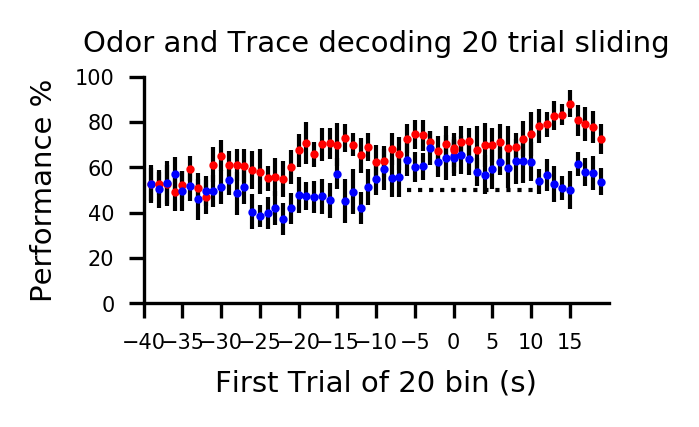

In [146]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
count = 0
for step_int in steps_list:
    ax.plot(ste_list[count], np.mean(eval("scores_tb_20_6_%s"%step_int))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_20_6_%s"%step_int))*100
    s = np.std(eval("scores_tb_20_6_%s"%step_int))*100 / np.sqrt(eval("scores_tb_20_6_%s"%step_int)[0].shape[-1])
    ax.errorbar(ste_list[count], m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(ste_list[count], np.mean(eval("scores_tb_20_8_%s"%step_int))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_20_8_%s"%step_int))*100
    s = np.std(eval("scores_tb_20_8_%s"%step_int))*100 / np.sqrt(eval("scores_tb_20_8_%s"%step_int)[0].shape[-1])
    ax.errorbar(ste_list[count], m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    count = count + 1
ax.set_ylim(0, 100)
ax.set_xlim(-40, len(vals_step)-40)
ax.set_xticks(np.arange(-40,len(vals_step)-40, 5))
ax.hlines(50,-6, 11, color='k', lw=1, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('First Trial of 20 bin (s)')
ax.set_ylabel('Performance %')
ax.set_title('Odor and Trace decoding 20 trial sliding')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [648]:
patterns_tb = {}
labels = {}
found = {}

for ani in all_animals:

    exec("patterns_tb[ani] = ut.load_variable('patterns_tb','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("labels[ani] = ut.load_variable('labels','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("found[ani] = ut.load_variable('found_ind','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    
loop_opt = [30]

#okay so I have found points and want to look in 20 trial bins starting 20 trials before

for i in range(len(found)):
    found[found.keys()[i]] = 40

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
step_int = 0
for loo in loop_opt:
    for step in vals_step:
        step_int = step_int + 1
        for t in [6,8]:
            exec('patterns_tb_%s_%s_%s = {}'%(loo,t,step_int))
            exec('labels_%s_%s = {}'%(loo,step_int))
            for ani in all_animals:
                if step_int<=40:
                    try:
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(loo,t,step_int,ani,ani,t))
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-step:found['%s']-step+loo]"%(loo,t,step_int,ani,loo,t,step_int,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-step:found['%s']-step+loo]"%(loo,step_int,ani,ani,ani,ani))

                    except IOError as error:
                        print error
                    continue    

                elif step_int>40:
                    try:
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(loo,t,step_int,ani,ani,t))
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']+step:found['%s']+step+loo]"%(loo,t,step_int,ani,loo,t,step_int,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']+step:found['%s']+step+loo]"%(loo,step_int,ani,ani,ani,ani))

                    except IOError as error:
                        print error
                    continue    



In [649]:
n_loops = 10
step_int=0
for step in vals_step:
    step_int = step_int + 1
    for t in [6,8]: # number of time bins
        for loo in loop_opt:
            exec('scores_tb_%s_%s_%s = []'%(loo,t,step_int))
            print step,
            exec("p_str = patterns_tb_%s_%s_%s"%(loo,t,step_int))
            exec("l_str = labels_%s_%s"%(loo,step_int))
            exec("scores_tb_%s_%s_%s = np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]]"%(loo,t,step_int))
            exec("scores_tb_%s_%s_%s = np.mean(scores_tb_%s_%s_%s,1)"%(loo,t,step_int,loo,t,step_int))
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 


39 39 38 38 37 37 36 36 35 35 34 34 33 33 32 32 31 31 30 30 29 29 28 28 27 27 26 26 25 25 24 24 23 23 22 22 21 21 20 20 19 19 18 18 17 17 16 16 15 15 14 14 13 13 12 12 11 11 10 10 9 9 8 8 7 7 6 6 5 5 4 4 3 3 2 2 1 1 0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9 10 10 11 11 12 12 13 13 14 14 15 15 16 16 17 17 18 18 19 19 20 20


In [218]:
scores_tb_30_6_20

array([ 0.7025,  0.755 ,  0.7625,  0.7775,  0.69  ,  0.75  ,  0.6625,
        0.5275,  0.7275,  0.5725])

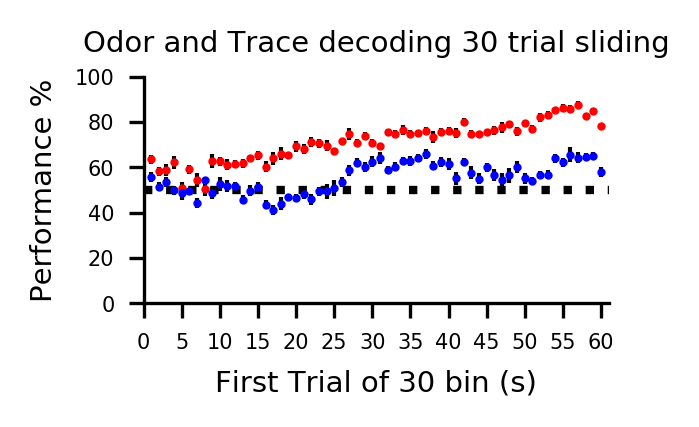

In [220]:
fig, ax = pl.subplots(1, 1, figsize=(2, 1))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
count = 0
for step_int in steps_list:
    ax.plot(step_int, np.mean(eval("scores_tb_30_6_%s"%step_int))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_30_6_%s"%step_int))*100
    s = np.std(eval("scores_tb_30_6_%s"%step_int))*100 / np.sqrt(eval("scores_tb_30_6_%s"%step_int).shape[-1])
    ax.errorbar(step_int, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax.plot(step_int, np.mean(eval("scores_tb_30_8_%s"%step_int))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_30_8_%s"%step_int))*100
    s = np.std(eval("scores_tb_30_8_%s"%step_int))*100 / np.sqrt(eval("scores_tb_30_8_%s"%step_int).shape[-1])
    ax.errorbar(step_int, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    count = count + 1
ax.set_ylim(0, 100)
ax.set_xlim(0, len(vals_step)+1)
ax.set_xticks(np.arange(0,len(vals_step)+1, 5))
ax.hlines(50, 0, len(vals_step)+1, color='k', lw=2, linestyles='dotted')
# ax.step(t, scores_tb3.mean(1), lw=.5, zorder=19, where='post')
# ax.vlines(t, 0, 100, zorder=0, lw=0.5, color='0.8')
pt.nicer_plot(ax)
ax.set_xlabel('First Trial of 30 bin (s)')
ax.set_ylabel('Performance %')
ax.set_title('Odor and Trace decoding 30 trial sliding')



# fig.savefig('img/proposal_decoding_timebased.svg')

In [642]:
import matplotlib.lines
from matplotlib.lines import Line2D
def add_significance_line(ax, array1, chance, x1, x2, y, color1='b',thresh=0.05, sig_func=None, thresholds=(0.05, 0.01, 0.001),lines=True,stars=True,mcc=1):
    #if sig_func is None:
    #    sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
    #p = sig_func(array1, array2)[-1]
    #print p
    #sig_value = sig_func(array1, array2)[0]
    sig_func = lambda x: sstats.wilcoxon(x)
    subtracted = [x-chance for x in array1]
    p = sig_func(subtracted)[-1]
    sig_value = sig_func(subtracted)[0]
    print p
    if lines==True:
        if p < thresh/mcc:
            line = Line2D([x1, x2], [y,y], lw=1, color=color1, clip_on=False)
            ax.add_line(line)
    if stars == True:
        ax.text(np.mean([x1, x2]), y+1,
            '' if p > thresholds[0]/mcc else
            '' if p > thresholds[1]/mcc else
            '**' if p > thresholds[2]/mcc else
            '***',
            ha='center', fontsize=4)
    return sig_value, p

In [652]:
sig_func = lambda x: sstats.wilcoxon(x)
chance = .5
od_sig = []
tr_sig = []
for t in steps_list:
    exec("subtracted = [x-chance for x in scores_tb_30_6_%s]"%(t))
    od_sig.append(sig_func(subtracted)[-1])
    exec("subtracted = [x-chance for x in scores_tb_30_8_%s]"%(t))
    tr_sig.append(sig_func(subtracted)[-1])
    
od_sig_plot = []
tr_sig_plot = []
bool_to_plot = []
p_thresh = .01
for i in range(len(od_sig)):
    if i == 0:
        if od_sig[0]<p_thresh and od_sig[1]<p_thresh and od_sig[2]<p_thresh and od_sig[3]<p_thresh and od_sig[4]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == 1:
        if od_sig[0]<p_thresh and od_sig[1]<p_thresh and od_sig[2]<p_thresh and od_sig[3]<p_thresh and od_sig[4]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[1]<p_thresh and od_sig[2]<p_thresh and od_sig[3]<p_thresh and od_sig[4]<p_thresh and od_sig[5]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == 2:
        if od_sig[0]<.05 and od_sig[1]<p_thresh and od_sig[2]<p_thresh and od_sig[3]<p_thresh and od_sig[4]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[1]<.05 and od_sig[2]<p_thresh and od_sig[3]<p_thresh and od_sig[4]<p_thresh and od_sig[5]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[2]<.05 and od_sig[3]<p_thresh and od_sig[4]<p_thresh and od_sig[5]<p_thresh and od_sig[6]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == 3:
        if od_sig[0]<.05 and od_sig[1]<p_thresh and od_sig[2]<p_thresh and od_sig[3]<p_thresh and od_sig[4]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[1]<.05 and od_sig[2]<p_thresh and od_sig[3]<p_thresh and od_sig[4]<p_thresh and od_sig[5]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[2]<.05 and od_sig[3]<p_thresh and od_sig[4]<p_thresh and od_sig[5]<p_thresh and od_sig[6]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[3]<.05 and od_sig[4]<p_thresh and od_sig[5]<p_thresh and od_sig[6]<p_thresh and od_sig[7]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == len(od_sig)-1:
        if od_sig[len(od_sig)-4]<p_thresh and od_sig[len(od_sig)-3]<p_thresh and od_sig[len(od_sig)-5]<p_thresh and od_sig[len(od_sig)-2]<p_thresh and od_sig[len(od_sig)-1]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == len(od_sig)-2:
        if od_sig[len(od_sig)-4]<p_thresh and od_sig[len(od_sig)-3]<p_thresh and od_sig[len(od_sig)-2]<p_thresh and od_sig[len(od_sig)-1]<p_thresh and od_sig[len(od_sig)-5]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[len(od_sig)-5]<p_thresh and od_sig[len(od_sig)-4]<p_thresh and od_sig[len(od_sig)-3]<p_thresh and od_sig[len(od_sig)-2]<p_thresh and od_sig[len(od_sig)-6]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
            
    elif i == len(od_sig)-3:
        if od_sig[len(od_sig)-4]<p_thresh and od_sig[len(od_sig)-3]<p_thresh and od_sig[len(od_sig)-2]<p_thresh and od_sig[len(od_sig)-1]<p_thresh and od_sig[len(od_sig)-5]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[len(od_sig)-5]<p_thresh and od_sig[len(od_sig)-4]<p_thresh and od_sig[len(od_sig)-3]<p_thresh and od_sig[len(od_sig)-2]<p_thresh and od_sig[len(od_sig)-6]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[len(od_sig)-5]<p_thresh and od_sig[len(od_sig)-4]<p_thresh and od_sig[len(od_sig)-3]<p_thresh and od_sig[len(od_sig)-6]<p_thresh and od_sig[len(od_sig)-7]<p_thresh:
            bool_to_plot.append(1)
        else:
            bool_to_plot.append(0)
    elif i == len(od_sig)-4:
        if od_sig[len(od_sig)-4]<p_thresh and od_sig[len(od_sig)-3]<p_thresh and od_sig[len(od_sig)-2]<p_thresh and od_sig[len(od_sig)-1]<p_thresh and od_sig[len(od_sig)-5]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[len(od_sig)-5]<p_thresh and od_sig[len(od_sig)-4]<p_thresh and od_sig[len(od_sig)-3]<p_thresh and od_sig[len(od_sig)-2]<p_thresh and od_sig[len(od_sig)-6]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[len(od_sig)-5]<p_thresh and od_sig[len(od_sig)-4]<p_thresh and od_sig[len(od_sig)-3]<p_thresh and od_sig[len(od_sig)-7]<p_thresh and od_sig[len(od_sig)-6]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[len(od_sig)-5]<p_thresh and od_sig[len(od_sig)-4]<p_thresh and od_sig[len(od_sig)-8]<p_thresh and od_sig[len(od_sig)-7]<p_thresh and od_sig[len(od_sig)-6]<p_thresh:
            bool_to_plot.append(1)
        else:
            bool_to_plot.append(0)
    else:
        if od_sig[i]<.05 and od_sig[i-1]<p_thresh and od_sig[i-2]<p_thresh and od_sig[i-3]<p_thresh and od_sig[i-4]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[i+1]<.05 and od_sig[i]<p_thresh and od_sig[i-1]<p_thresh and od_sig[i-2]<p_thresh and od_sig[i-3]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[i+2]<.05 and od_sig[i+1]<p_thresh and od_sig[i]<p_thresh and od_sig[i-1]<p_thresh and od_sig[i-2]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[i+3]<.05 and od_sig[i+2]<p_thresh and od_sig[i+1]<p_thresh and od_sig[i]<p_thresh and od_sig[i-1]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[i+3]<.05 and od_sig[i+2]<p_thresh and od_sig[i+1]<p_thresh and od_sig[i]<p_thresh and od_sig[i+4]<p_thresh:
            bool_to_plot.append(1)
        else:
            bool_to_plot.append(0)
od_bool_to_plot = bool_to_plot            
bool_to_plot = []
for i in range(len(tr_sig)):
    if i == 0:
        if tr_sig[0]<p_thresh and tr_sig[1]<p_thresh and tr_sig[2]<p_thresh and tr_sig[3]<p_thresh and tr_sig[4]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == 1:
        if tr_sig[0]<p_thresh and tr_sig[1]<p_thresh and tr_sig[2]<p_thresh and tr_sig[3]<p_thresh and tr_sig[4]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[1]<p_thresh and tr_sig[2]<p_thresh and tr_sig[3]<p_thresh and tr_sig[4]<p_thresh and tr_sig[5]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == 2:
        if tr_sig[0]<.05 and tr_sig[1]<p_thresh and tr_sig[2]<p_thresh and tr_sig[3]<p_thresh and tr_sig[4]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[1]<.05 and tr_sig[2]<p_thresh and tr_sig[3]<p_thresh and tr_sig[4]<p_thresh and tr_sig[5]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[2]<.05 and tr_sig[3]<p_thresh and tr_sig[4]<p_thresh and tr_sig[5]<p_thresh and tr_sig[6]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == 3:
        if tr_sig[0]<.05 and tr_sig[1]<p_thresh and tr_sig[2]<p_thresh and tr_sig[3]<p_thresh and tr_sig[4]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[1]<.05 and tr_sig[2]<p_thresh and tr_sig[3]<p_thresh and tr_sig[4]<p_thresh and tr_sig[5]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[2]<.05 and tr_sig[3]<p_thresh and tr_sig[4]<p_thresh and tr_sig[5]<p_thresh and tr_sig[6]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[3]<.05 and tr_sig[4]<p_thresh and tr_sig[5]<p_thresh and tr_sig[6]<p_thresh and tr_sig[7]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == len(od_sig)-1:
        if tr_sig[len(od_sig)-4]<p_thresh and tr_sig[len(od_sig)-3]<p_thresh and tr_sig[len(od_sig)-5]<p_thresh and tr_sig[len(od_sig)-2]<p_thresh and tr_sig[len(od_sig)-1]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == len(od_sig)-2:
        if tr_sig[len(od_sig)-4]<p_thresh and tr_sig[len(od_sig)-3]<p_thresh and tr_sig[len(od_sig)-2]<p_thresh and tr_sig[len(od_sig)-1]<p_thresh and tr_sig[len(od_sig)-5]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[len(od_sig)-5]<p_thresh and tr_sig[len(od_sig)-4]<p_thresh and tr_sig[len(od_sig)-3]<p_thresh and tr_sig[len(od_sig)-2]<p_thresh and tr_sig[len(od_sig)-6]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
            
    elif i == len(od_sig)-3:
        if tr_sig[len(od_sig)-4]<p_thresh and tr_sig[len(od_sig)-3]<p_thresh and tr_sig[len(od_sig)-2]<p_thresh and tr_sig[len(od_sig)-1]<p_thresh and tr_sig[len(od_sig)-5]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[len(od_sig)-5]<p_thresh and tr_sig[len(od_sig)-4]<p_thresh and tr_sig[len(od_sig)-3]<p_thresh and tr_sig[len(od_sig)-2]<p_thresh and tr_sig[len(od_sig)-6]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[len(od_sig)-5]<p_thresh and tr_sig[len(od_sig)-4]<p_thresh and tr_sig[len(od_sig)-3]<p_thresh and tr_sig[len(od_sig)-6]<p_thresh and tr_sig[len(od_sig)-7]<p_thresh:
            bool_to_plot.append(1)
        else:
            bool_to_plot.append(0)
    elif i == len(od_sig)-4:
        if tr_sig[len(od_sig)-4]<p_thresh and tr_sig[len(od_sig)-3]<p_thresh and tr_sig[len(od_sig)-2]<p_thresh and tr_sig[len(od_sig)-1]<p_thresh and tr_sig[len(od_sig)-5]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[len(od_sig)-5]<p_thresh and tr_sig[len(od_sig)-4]<p_thresh and tr_sig[len(od_sig)-3]<p_thresh and tr_sig[len(od_sig)-2]<p_thresh and tr_sig[len(od_sig)-6]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[len(od_sig)-5]<p_thresh and tr_sig[len(od_sig)-4]<p_thresh and tr_sig[len(od_sig)-3]<p_thresh and tr_sig[len(od_sig)-7]<p_thresh and tr_sig[len(od_sig)-6]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[len(od_sig)-5]<p_thresh and tr_sig[len(od_sig)-4]<p_thresh and tr_sig[len(od_sig)-8]<p_thresh and tr_sig[len(od_sig)-7]<p_thresh and tr_sig[len(od_sig)-6]<p_thresh:
            bool_to_plot.append(1)
        else:
            bool_to_plot.append(0)
    else:
        if tr_sig[i]<.05 and tr_sig[i-1]<p_thresh and tr_sig[i-2]<p_thresh and tr_sig[i-3]<p_thresh and tr_sig[i-4]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[i+1]<.05 and tr_sig[i]<p_thresh and tr_sig[i-1]<p_thresh and tr_sig[i-2]<p_thresh and tr_sig[i-3]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[i+2]<.05 and tr_sig[i+1]<p_thresh and tr_sig[i]<p_thresh and tr_sig[i-1]<p_thresh and tr_sig[i-2]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[i+3]<.05 and tr_sig[i+2]<p_thresh and tr_sig[i+1]<p_thresh and tr_sig[i]<p_thresh and tr_sig[i-1]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[i+3]<.05 and tr_sig[i+2]<p_thresh and tr_sig[i+1]<p_thresh and tr_sig[i]<p_thresh and tr_sig[i+4]<p_thresh:
            bool_to_plot.append(1)
        else:
            bool_to_plot.append(0)
tr_bool_to_plot = bool_to_plot          

In [659]:
sig_func = lambda x: sstats.wilcoxon(x)
chance = .5
od_sig = []
tr_sig = []
for t in steps_list:
    exec("subtracted = [x-chance for x in scores_tb_30_6_%s]"%(t))
    od_sig.append(sig_func(subtracted)[-1])
    exec("subtracted = [x-chance for x in scores_tb_30_8_%s]"%(t))
    tr_sig.append(sig_func(subtracted)[-1])
    
od_sig_plot = []
tr_sig_plot = []
bool_to_plot = []
p_thresh = .01
for i in range(len(od_sig)):
    if i == 0:
        if od_sig[0]<p_thresh and od_sig[1]<p_thresh and od_sig[2]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == 1:
        if od_sig[0]<p_thresh and od_sig[1]<p_thresh and od_sig[2]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[1]<p_thresh and od_sig[2]<p_thresh and od_sig[3]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    
    elif i == len(od_sig)-1:
        if od_sig[len(od_sig)-3]<p_thresh and od_sig[len(od_sig)-2]<p_thresh and od_sig[len(od_sig)-1]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == len(od_sig)-2:
        if od_sig[len(od_sig)-3]<p_thresh and od_sig[len(od_sig)-2]<p_thresh and od_sig[len(od_sig)-1]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[len(od_sig)-4]<p_thresh and od_sig[len(od_sig)-3]<p_thresh and od_sig[len(od_sig)-2]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
            
    else:
        if od_sig[i]<.05 and od_sig[i-1]<p_thresh and od_sig[i-2]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[i+1]<.05 and od_sig[i]<p_thresh and od_sig[i-1]<p_thresh:
            bool_to_plot.append(1)
        elif od_sig[i+2]<.05 and od_sig[i+1]<p_thresh and od_sig[i]<p_thresh:
            bool_to_plot.append(1)
        else:
            bool_to_plot.append(0)
od_bool_to_plot = bool_to_plot            
bool_to_plot = []
for i in range(len(tr_sig)):
    if i == 0:
        if tr_sig[0]<p_thresh and tr_sig[1]<p_thresh and tr_sig[2]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == 1:
        if tr_sig[0]<p_thresh and tr_sig[1]<p_thresh and tr_sig[2]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[1]<p_thresh and tr_sig[2]<p_thresh and tr_sig[3]<p_thresh:
            bool_to_plot.append(1)
        else:
            bool_to_plot.append(0)
   
    elif i == len(od_sig)-1:
        if tr_sig[len(od_sig)-3]<p_thresh and tr_sig[len(od_sig)-2]<p_thresh and tr_sig[len(od_sig)-1]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
    elif i == len(od_sig)-2:
        if tr_sig[len(od_sig)-3]<p_thresh and tr_sig[len(od_sig)-2]<p_thresh and tr_sig[len(od_sig)-1]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[len(od_sig)-4]<p_thresh and tr_sig[len(od_sig)-3]<p_thresh and tr_sig[len(od_sig)-2]<p_thresh:
            bool_to_plot.append(1)
        else:
            
            bool_to_plot.append(0)
            
    else:
        if tr_sig[i]<.05 and tr_sig[i-1]<p_thresh and tr_sig[i-2]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[i+1]<.05 and tr_sig[i]<p_thresh and tr_sig[i-1]<p_thresh:
            bool_to_plot.append(1)
        elif tr_sig[i+2]<.05 and tr_sig[i+1]<p_thresh and tr_sig[i]<p_thresh:
            bool_to_plot.append(1)
        else:
            bool_to_plot.append(0)
tr_bool_to_plot = bool_to_plot          

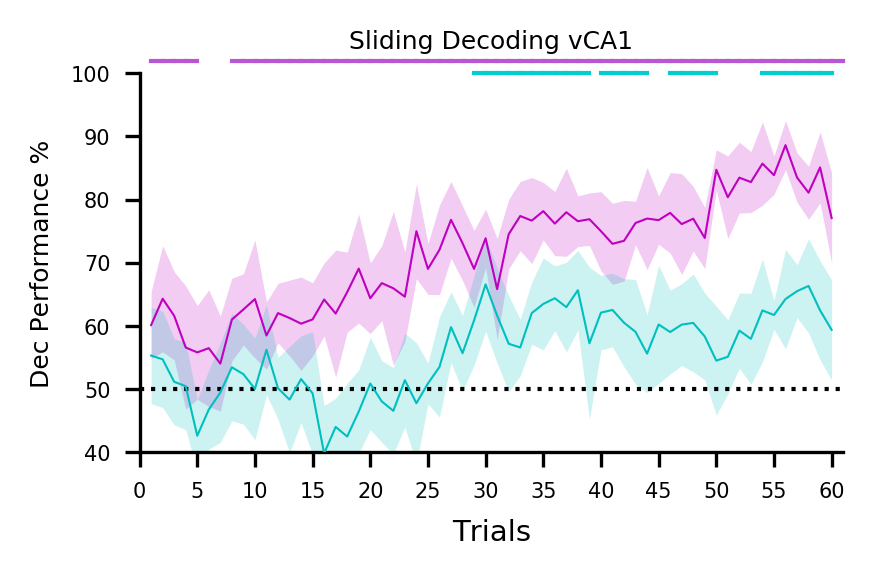

In [660]:
fig, ax = pl.subplots(1,1, figsize=(3, 2))

loops=10
for tb,c in zip([6,8],['m','c']):
    ax.plot([t for t in steps_list], [(np.mean(eval("scores_tb_30_%s_%s"%(tb,t)))*100) for t in steps_list],
        color=c, ls='-',lw=.5, zorder=19 ,ms=1,label=tb)
    m = np.array([(np.mean(eval("scores_tb_30_%s_%s"%(tb,t)))*100) for t in steps_list])
    s = np.array([np.std(eval("scores_tb_30_%s_%s"%(tb,t)))*100 for t in steps_list])
    ax.fill_between([t for t in steps_list],m-s,m+s,alpha=0.2,color=c,linewidth=0)
    if tb == 6:
        for t in steps_list:
            if od_bool_to_plot[t-1]==1:
                line = Line2D([t, t+1], [102,102], lw=1, color='mediumorchid', clip_on=False)
                ax.add_line(line)
    else: 
        for t in steps_list:
             if tr_bool_to_plot[t-1]==1:
                line = Line2D([t, t+1], [100,100], lw=1, color='darkturquoise', clip_on=False)
                ax.add_line(line)
           
ax.set_xlim(0, len(vals_step)+1)
ax.set_xticks(np.arange(0,len(vals_step)+1, 5))
ax.hlines(50, 0, len(vals_step)+1, color='k', lw=1, linestyles='dotted')        

ax.set_xticklabels(np.arange(0,len(vals_step)+1, 5))
ax.set_ylim(40, 100)
ax.set_xlabel('Trials')
ax.set_ylabel('Dec Performance %',fontsize=6)
ax.set_title('Sliding Decoding vCA1', color ='k',fontsize=6)
#ax[0][0].legend(bbox_to_anchor=(.7, .99), loc='upper left', borderaxespad=0.)

fig.tight_layout(pad=2)
fig.savefig('../final-ish figures/%s_PrPo_dv.pdf'%NOTEBOOK_NAME)

In [661]:
m_scores_6 = []
m_scores_8 = []
for tb in [6,8]:
    for t in steps_list:
        exec("m_scores_%s.append(np.mean(scores_tb_30_%s_%s*100))"%(tb,tb,t))

7.78325154765e-09
2.4167643102e-10


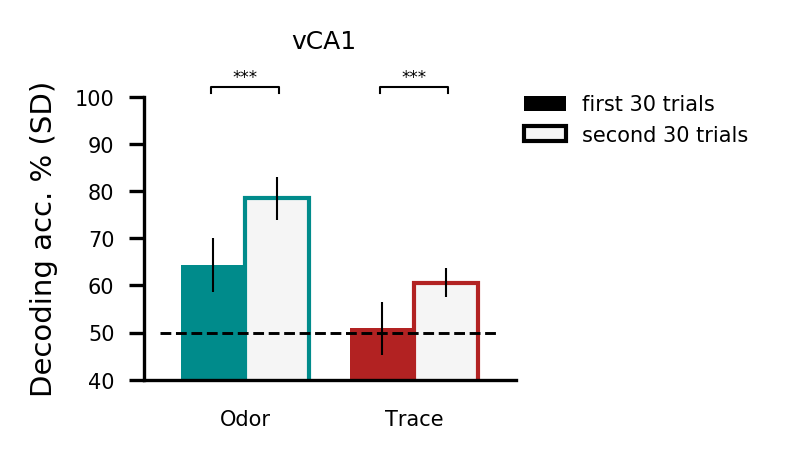

In [666]:
from matplotlib.patches import Patch
labels = ['Odor','Trace']
x = np.arange(len(labels))  # the label locations
width = 0.38  # the width of the bars
                                      
v={}
d={}
to_plot = [1,2]

dark_co = ('forestgreen','darkcyan','firebrick','lightgrey','dimgrey','goldenrod')
fig, ax = pl.subplots(figsize=(1.6,1.25))
for c,i in zip(to_plot,range(2)):
    if c ==1:
        v = np.array(np.std(m_scores_6[0:30]))
        ax.bar(i - width/2, np.mean(m_scores_6[0:30]), width, color=dark_co[c],yerr=v)
        d = np.array(np.std(m_scores_6[30:60]))
        ax.bar(i + width/2,  np.mean(m_scores_6[30:60]), width,color='whitesmoke', edgecolor=dark_co[c],yerr=d)
    else:
        v = np.array(np.std(m_scores_8[0:30]))
        ax.bar(i - width/2, np.mean(m_scores_8[0:30]), width, color=dark_co[c],yerr=v)
        d = np.array(np.std(m_scores_8[30:60]))
        ax.bar(i + width/2,  np.mean(m_scores_8[30:60]), width,color='whitesmoke', edgecolor=dark_co[c],yerr=d)
ax.hlines(50,-.5,1.5, color='k', lw=.7, linestyles='dashed')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Decoding acc. % (SD)')
#ax.set_title('Decoding During CS')
ax.set_ylim(40,100)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([Patch(facecolor='k'),Patch(facecolor='whitesmoke',edgecolor='k')],['first 30 trials','second 30 trials'],loc=(1,.8),frameon=False)
ax.tick_params(axis='x',bottom=False)
pvs=[]
pvs.append(add_significance(ax, m_scores_8[0:30], m_scores_8[30:60],-.2+1,0.2+1,102))
pvs.append(add_significance(ax, m_scores_6[0:30], m_scores_6[30:60],-.2+0,0.2+0,102))
        #max(np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess],
        #    np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess])+6))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_vhpc[sess][:loops],.5,-.2+i,
    #           np.mean(mean_scores_gmin_tb_6_vhpc[sess][:loops])*100+v[sess]+1,loops=loops,sig_func=None,colors='k'))
    #pvs.append(sig_vs_chance(ax,mean_scores_gmin_tb_6_dhpc[sess][:loops],.5, .2+i,
    #           np.mean(mean_scores_gmin_tb_6_dhpc[sess][:loops])*100+d[sess]+1,loops=loops,sig_func=None,colors='k'))
pl.suptitle('vCA1',y=1.06,fontsize=6)



# Animal by Animal Decoding noting Aha timing

In [467]:
vals_step = range(40)
vals_step
vals_step.reverse()
for i in range(171):
    if i>0:
        vals_step.append(i)
print vals_step

[39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170]


In [468]:
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.svm import SVC

def do_test_within(patterns, labels, n_cells=None):

    which_train_a = np.random.permutation(np.where(labels==0)[0])
    which_test_a = which_train_a[:len(which_train_a)/2]
    which_train_a = which_train_a[len(which_train_a)/2:]

    which_train_b = np.random.permutation(np.where(labels==1)[0])
    which_test_b = which_train_b[:len(which_train_b)/2]
    which_train_b = which_train_b[len(which_train_b)/2:]

    which_train = np.concatenate((which_train_a, which_train_b))
    which_test = np.concatenate((which_test_a, which_test_b))

    patterns_t = patterns.copy()
    labels_t = labels.copy()
    patterns_T = patterns.copy()
    labels_T = labels.copy()
    patterns_t = patterns[which_train]
    labels_t = labels[which_train]
    patterns_T = patterns[which_test]
    labels_T = labels[which_test]
#    patterns_comb_train, labels_comb = ut.combine_patterns(patterns_t, labels_t)
#    patterns_comb_test, labels_comb = ut.combine_patterns(patterns_T, labels_T)
        #if n_cells is None:
         #   cells[ani] = list(range(patterns_comb_train.shape[1]))
        #else:
        #    cells[ani] = np.random.choice(range(patterns_train.shape[1]), size=n_cells, replace=False)
        
    decoder.fit(patterns_t, labels_t)
    scores = decoder.score(patterns_T, labels_T)
    decoder.fit(patterns_T, labels_T)
    return np.append(scores, decoder.score(patterns_t, labels_t))

In [469]:
patterns_tb = {}
labels = {}
found = {}

for ani in all_animals:

    exec("patterns_tb[ani] = ut.load_variable('patterns_tb','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("labels[ani] = ut.load_variable('labels','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    exec("found[ani] = ut.load_variable('found_ind','../%s/notebooks/autorestore/aha_find_decode/')"%(ani))
    
loop_opt = [30]

#okay so I have found points and want to look in 20 trial bins starting 20 trials before

for i in range(len(found)):
    found[found.keys()[i]] = 40

founds = ['b','a']
#for loo in loo_opt:
    #for ani in animals:
step_int = 0
for loo in loop_opt:
    for step in vals_step:
        step_int = step_int + 1
        for t in [6,8]:
            exec('patterns_tb_%s_%s_%s = {}'%(loo,t,step_int))
            exec('labels_%s_%s = {}'%(loo,step_int))
            for ani in all_animals:
                if step_int<=40:
                    try:
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(loo,t,step_int,ani,ani,t))
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']-step:found['%s']-step+loo]"%(loo,t,step_int,ani,loo,t,step_int,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']-step:found['%s']-step+loo]"%(loo,step_int,ani,ani,ani,ani))

                    except IOError as error:
                        print error
                    continue    

                elif step_int>40:
                    try:
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb['%s'][%s]"%(loo,t,step_int,ani,ani,t))
                        exec("patterns_tb_%s_%s_%s['%s'] = patterns_tb_%s_%s_%s['%s'][:][found['%s']+step:found['%s']+step+loo]"%(loo,t,step_int,ani,loo,t,step_int,ani,ani,ani))
                        exec("labels_%s_%s['%s'] = labels['%s'][found['%s']+step:found['%s']+step+loo]"%(loo,step_int,ani,ani,ani,ani))

                    except IOError as error:
                        print error
                    continue    



In [ ]:
n_loops = 1000
step_int=0
for step in vals_step:
    step_int = step_int + 1
    for t in [6,8]: # number of time bins
        for loo in loop_opt:
            exec('scores_tb_%s_%s_%s = {}'%(loo,t,step_int))
            for ani in all_animals:
                print step_int,
                exec("p_str = patterns_tb_%s_%s_%s['%s']"%(loo,t,step_int,ani))
                exec("l_str = labels_%s_%s['%s']"%(loo,step_int,ani))
                exec("scores_tb_%s_%s_%s['%s'] = np.r_[[do_test_within(p_str,l_str) for i in range(n_loops)]]"%(loo,t,step_int,ani))
                exec("scores_tb_%s_%s_%s['%s'] = np.mean(scores_tb_%s_%s_%s['%s'],1)"%(loo,t,step_int,ani,loo,t,step_int,ani))
            #[do_test_within(eval('patterns_tb_%s_%s_%s'%(f,loo,t)),eval('labels_%s_%s'%(f,loo))) for i in range(n_loops)]
            #            eval("scores_tb_%s_%s_%s"%(f,loo,t)) = 


1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4

In [504]:
scores_tb_30_8_5.keys()

['c3f2', 'c3f3', 'c10m8', '90', '91', 'c4m3', 'c3m1', 'c4m4', 'c3m2']

In [640]:
steps_list = []

for i in range(len(vals_step)):
    steps_list.append(i+1)


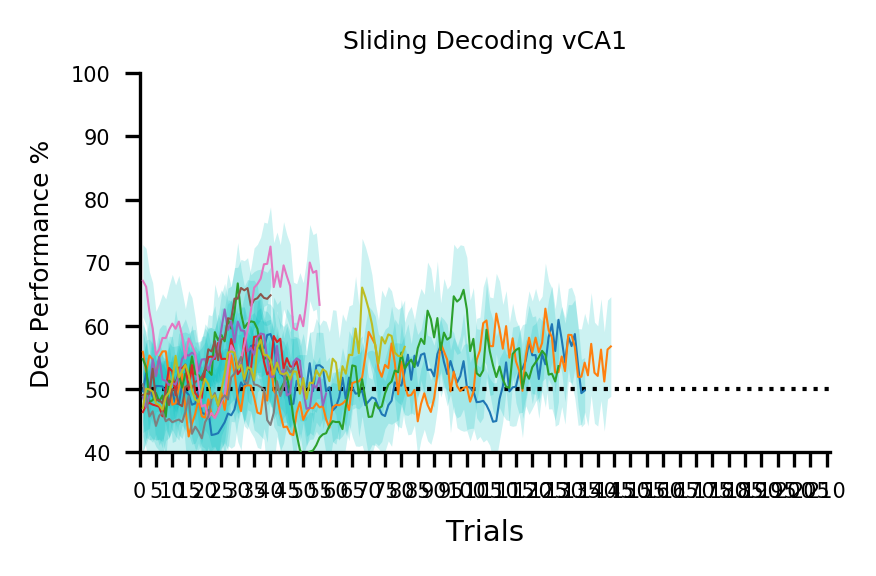

In [513]:
fig, ax = pl.subplots(1,1, figsize=(3, 2))

colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']

ani_c = 0
loops=10
for ani in all_animals:
    for tb in [8]:
        ax.plot([t for t in steps_list[0:found[ani]]], [(np.mean(eval("scores_tb_30_%s_%s['%s']"%(tb,t,ani)))*100) for t in steps_list[0:found[ani]]],
            color=colors[ani_c], ls='-',lw=.5, zorder=19 ,ms=1,label=tb)
        m = np.array([(np.mean(eval("scores_tb_30_%s_%s['%s']"%(tb,t,ani)))*100) for t in steps_list[0:found[ani]]])
        s = np.array([np.std(eval("scores_tb_30_%s_%s['%s']"%(tb,t,ani)))*100 for t in steps_list[0:found[ani]]])
        ax.fill_between([t for t in steps_list[0:found[ani]]],m-s,m+s,alpha=0.2,color=c,linewidth=0)
       
        ani_c = ani_c+1
ax.set_xlim(0, len(vals_step)+1)
ax.set_xticks(np.arange(0,len(vals_step)+1, 5))
ax.hlines(50, 0, len(vals_step)+1, color='k', lw=1, linestyles='dotted')        

ax.set_xticklabels(np.arange(0,len(vals_step)+1, 5))
ax.set_ylim(40, 100)
ax.set_xlabel('Trials')
ax.set_ylabel('Dec Performance %',fontsize=6)
ax.set_title('Sliding Decoding vCA1', color ='k',fontsize=6)
#ax[0][0].legend(bbox_to_anchor=(.7, .99), loc='upper left', borderaxespad=0.)

fig.tight_layout(pad=2)
fig.savefig('../final-ish figures/%s_PrPo_dv.pdf'%NOTEBOOK_NAME)

In [140]:
save_workspace(db)

Could not store variable 'sstats'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'di'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'sig_func'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'np'. Skipping...
